In [185]:
# 使用K均值算法

In [186]:
# 分别导入pandas分别读取训练集和测试集

In [187]:
import pandas as pd
import numpy as np

In [188]:
# 读取训练集
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
# 读取测试集
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [189]:
import matplotlib.pyplot as plt

In [190]:
# 从训练集和测试集上都分离出64维度的相素特征与一维的数字特征

In [191]:
X_train = digits_train[np.arange(64)]

In [192]:
y_train = digits_train[64]

In [193]:
X_test  = digits_test[np.arange(64)]

In [194]:
y_test = digits_test[64]

In [195]:
# 从sklearn.cluster中导入Kmeans模型

In [196]:
from  sklearn.cluster  import KMeans

In [197]:
# 初始化Kmeans模型，并导入聚类中心数量为10
kmeans = KMeans(n_clusters=10)

In [198]:
# 使用kmeans对模型进行训练
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [199]:
# 逐条判断每个测试图像所属的聚类中心

In [200]:
y_pred = kmeans.predict(X_test)

In [201]:
# 使用ARI进行Kmeans聚类性能评估

In [202]:
from sklearn import metrics

In [203]:
# print metrics.adjusted_rand_score(y_test,y_pred)
# 使用ARI进行KMeans聚类性能评估。
print metrics.adjusted_rand_score(y_test, y_pred)

0.663057794933


In [204]:
# 从sklearn.metrics导入silhouette_score用于计算轮廓系数

In [205]:
from sklearn.metrics import  silhouette_score

In [206]:
# 分割出3*2=6个子图，并在1号子图作图

In [207]:
plt.subplot(3,2,1)

In [208]:
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])

In [209]:
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

In [210]:
X = np.array(zip(x1,x2)).reshape(len(x1),2) 

In [211]:
# 在1号子图中作出原始数据点阵的分布

In [212]:
plt.xlim([0,10])

(0, 10)

In [213]:
plt.ylim([0,10])

(0, 10)

In [214]:
plt.title('Instance')

In [215]:
plt.scatter(x1,x2)

In [216]:
colors = ['b','g','r','c','m','y','k','b']

In [217]:
markers = ['o','s','D','v','^','p','*','+']

In [218]:
clusters = [2,3,4,5,8]

In [219]:
subplot_counter = 1

In [220]:
sc_scores=[]

In [221]:
for t  in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i,l in enumerate(kmeans_model.labels_):
            plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score = silhouette_score(X,kmeans_model.labels_,metric='euclidean')
    
    sc_scores.append(sc_score)
    
    plt.title('k=%s,silhouette coefficient=%0.03f'%(t,sc_score))

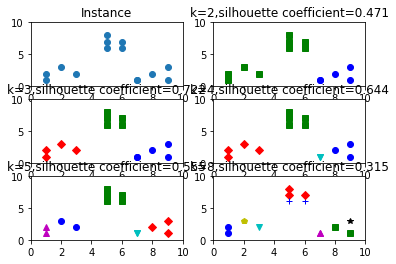

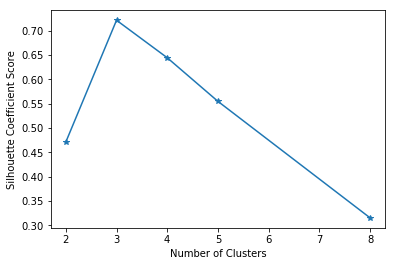

In [222]:
#plt.plot(clusters,sc_scores,'bx-')
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()

In [244]:
from scipy.spatial.distance import cdist

In [223]:
cluster1 = np.random.uniform(0.5,1.5,(2,10))

In [224]:
cluster2 = np.random.uniform(5.5,6.5,(2,10))

In [225]:
cluster3 = np.random.uniform(3.0,4.0,(2,10))

In [231]:
X = np.hstack((cluster1,cluster2,cluster3)).T

In [235]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')

In [236]:
plt.ylabel('x2')

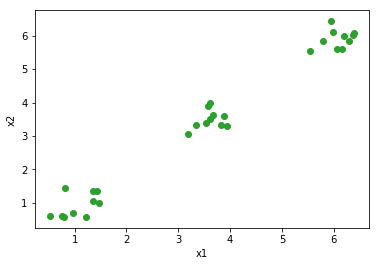

In [237]:
plt.show()

In [238]:
K = range(1,10)

In [240]:
meandistortions=[]

In [245]:
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

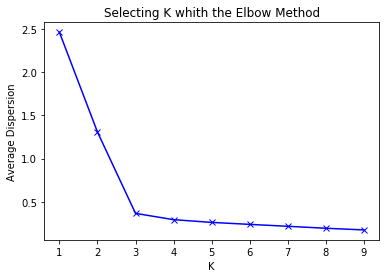

In [246]:
plt.plot(K,meandistortions,'bx-')
plt.xlabel('K')
plt.ylabel('Average Dispersion')
plt.title('Selecting K whith the Elbow Method')
plt.show()